In [167]:
import pandas as pd
import tabula
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import zipfile
import tempfile
import requests
from io import BytesIO

In [169]:
#Traer precios de vivienda de SHF
urlpdf="https://www.gob.mx/cms/uploads/attachment/file/915210/_ndice_SHF_T1_2024.pdf"
shf=tabula.read_pdf(urlpdf,multiple_tables=True, pages='9')
#Pasar a dataframe
shf=shf[0]
#Dejar solo las primeras dos columnas
shf=shf.iloc[:,0:2]
#Renombrar columnas
shf.columns=['estado','precio']
#Filtrar para cdmx
shf=shf[shf['estado'].str.contains('Ciudad de México')]
#Eliminar comas de precio y transformar a numérico
shf['precio']=shf['precio'].str.replace(',','').astype('float')
shf

,estado,precio
9,Ciudad de México,3957886.0


In [177]:
#Leer diccionario de datos
url = "https://docs.google.com/spreadsheets/d/1EHwghxbwXLIRdebN9tILb-ORt7pwc5H9/edit#gid=887021272"
url_for_pandas = url.replace("/edit#gid=887021272", "/export?format=xlsx")
diccionario = pd.read_excel(url_for_pandas, engine='openpyxl',sheet_name='Rango salario', usecols='A:B',skipfooter=1,skiprows=1)
#Renombrar columnas
diccionario.columns=['rango_salarial','descripcion']
diccionario

,rango_salarial,descripcion
0,W1,Hasta 1 vez el salario mínimo
1,W2,mayor a 1 y hasta 2 veces el salario mínimo
2,W3,mayor a 2 y hasta 3 veces el salario mínimo
3,W4,mayor a 3 y hasta 4 veces el salario mínimo
4,W5,mayor a 4 y hasta 5 veces el salario mínimo
5,W6,mayor a 5 y hasta 6 veces el salario mínimo
6,W7,mayor a 6 y hasta 7 veces el salario mínimo
7,W8,mayor a 7 y hasta 8 veces el salario mínimo
8,W9,mayor a 8 y hasta 9 veces el salario mínimo
9,W10,mayor a 9 y hasta 10 veces el salario mínimo


In [171]:
url = "https://github.com/claudiodanielpc/vivienda_cdmx/raw/main/asg-2024-04-30.zip"

# Descargar el archivo ZIP
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# Crear un directorio temporal
with tempfile.TemporaryDirectory() as tmpdirname:
    # Extraer el contenido del archivo ZIP en el directorio temporal
    zip_file.extractall(tmpdirname)
    
    # Buscar todos los archivos CSV en el directorio temporal
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
    
    # Leer el primer archivo CSV
    if csv_files:
        imss = pd.read_csv(f"{tmpdirname}/{csv_files[0]}", sep='|', encoding='latin1', low_memory=False)
imss

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
1,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
2,1,1,1,A01,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
3,1,1,1,A01,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4,1,1,1,A01,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592651,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2025.22,0.0,0.0,2025.22,0.0
4592652,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2151.95,0.0,0.0,2151.95,0.0
4592653,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,2574.42,0.0,0.0,2574.42,0.0
4592654,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1621.74,0.0,0.0,1621.74,0.0


In [172]:
imss = imss[imss['cve_delegacion'].isin([39, 40])]
imss

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
4102327,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4102328,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4102329,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4102330,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
4102331,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592651,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2025.22,0.0,0.0,2025.22,0.0
4592652,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2151.95,0.0,0.0,2151.95,0.0
4592653,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,2574.42,0.0,0.0,2574.42,0.0
4592654,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,...,1,0,0,1,0,1621.74,0.0,0.0,1621.74,0.0


In [186]:
print("Total de trabajadores asegurados en CDMX:", imss['ta'].sum())

Total de trabajadores asegurados en CDMX: 3490972


In [181]:
#Crear tabla resumen de asegurados, masa y agrupado por rango_salarial

tabla_resumen = imss.groupby(['rango_salarial']).agg({'ta': 'sum', 'masa_sal_ta': 'sum'}).reset_index()
#Pegar descripción de rango_salarial
tabla_resumen = pd.merge(tabla_resumen, diccionario, on='rango_salarial', how='left')
#Obtener salario promedio
tabla_resumen['salario_prom_diario'] = tabla_resumen['masa_sal_ta'] / tabla_resumen['ta']
#Salario mensual
tabla_resumen['salario_prom_mensual'] = tabla_resumen['salario_prom_diario'] * 30.4
#Calcular 30% de salario promedio_mensual como mensualidad para vivienda
tabla_resumen['mensualidad_para_vivienda'] = tabla_resumen['salario_prom_mensual'] * 0.30
#Insertar columna precio_medio_vivienda de shf
tabla_resumen['precio_medio_vivienda'] = shf['precio'].mean()
#Calcular cuántos años se tarda en pagar la vivienda
tabla_resumen['tiempo_liquida_vivienda'] = round(tabla_resumen['precio_medio_vivienda'] / tabla_resumen['mensualidad_para_vivienda'] / 12,0)
#Transformar a entero
tabla_resumen['tiempo_liquida_vivienda'] = tabla_resumen['tiempo_liquida_vivienda'].astype('int')
#Ordenar de mayor a menor tiempo_liquida_vivienda
tabla_resumen=tabla_resumen.sort_values('tiempo_liquida_vivienda', ascending=False)
#Seleccionar columnas de descripcion, salario_prom_mensual, mensualidad y tiempo_liquida_vivienda
tabla_resumen=tabla_resumen[['descripcion','ta','precio_medio_vivienda','salario_prom_mensual','mensualidad_para_vivienda','tiempo_liquida_vivienda']]
#Calcular porcentaje de ta
tabla_resumen['pct'] = round((tabla_resumen['ta'] / tabla_resumen['ta'].sum())*100,2)
#Renombrar columnas
tabla_resumen.columns=['Rango salarial','Trabajadores asegurados','Precio medio de la vivienda','Salario promedio mensual','Mensualidad para vivienda','Tiempo (años) para liquidar la vivienda', 'Porcentaje de trabajadores asegurados']
#Números con separador de miles y dos decimales
tabla_resumen['Precio medio de la vivienda'] = tabla_resumen['Precio medio de la vivienda'].map('{:,.2f}'.format)
tabla_resumen['Salario promedio mensual'] = tabla_resumen['Salario promedio mensual'].map('{:,.2f}'.format)
tabla_resumen['Mensualidad para vivienda'] = tabla_resumen['Mensualidad para vivienda'].map('{:,.2f}'.format)
tabla_resumen['Trabajadores asegurados'] = tabla_resumen['Trabajadores asegurados'].map('{:,}'.format)
tabla_resumen

,Rango salarial,Trabajadores asegurados,Precio medio de la vivienda,Salario promedio mensual,Mensualidad para vivienda,Tiempo (años) para liquidar la vivienda,Porcentaje de trabajadores asegurados
0,Hasta 1 vez el salario mínimo,"21,398","3,957,886.00","7,567.33","2,270.20",145,0.61
3,mayor a 1 y hasta 2 veces el salario mínimo,"1,964,822","3,957,886.00","9,610.01","2,883.00",114,56.35
4,mayor a 2 y hasta 3 veces el salario mínimo,"482,186","3,957,886.00","18,493.85","5,548.15",59,13.83
5,mayor a 3 y hasta 4 veces el salario mínimo,"284,565","3,957,886.00","26,187.32","7,856.20",42,8.16
6,mayor a 4 y hasta 5 veces el salario mínimo,"172,431","3,957,886.00","33,820.52","10,146.16",33,4.95
7,mayor a 5 y hasta 6 veces el salario mínimo,"116,107","3,957,886.00","41,383.81","12,415.14",27,3.33
8,mayor a 6 y hasta 7 veces el salario mínimo,"86,317","3,957,886.00","49,019.17","14,705.75",22,2.48
9,mayor a 7 y hasta 8 veces el salario mínimo,"63,980","3,957,886.00","56,492.74","16,947.82",19,1.83
10,mayor a 8 y hasta 9 veces el salario mínimo,"45,224","3,957,886.00","64,140.04","19,242.01",17,1.30
1,mayor a 9 y hasta 10 veces el salario mínimo,"37,577","3,957,886.00","71,777.97","21,533.39",15,1.08


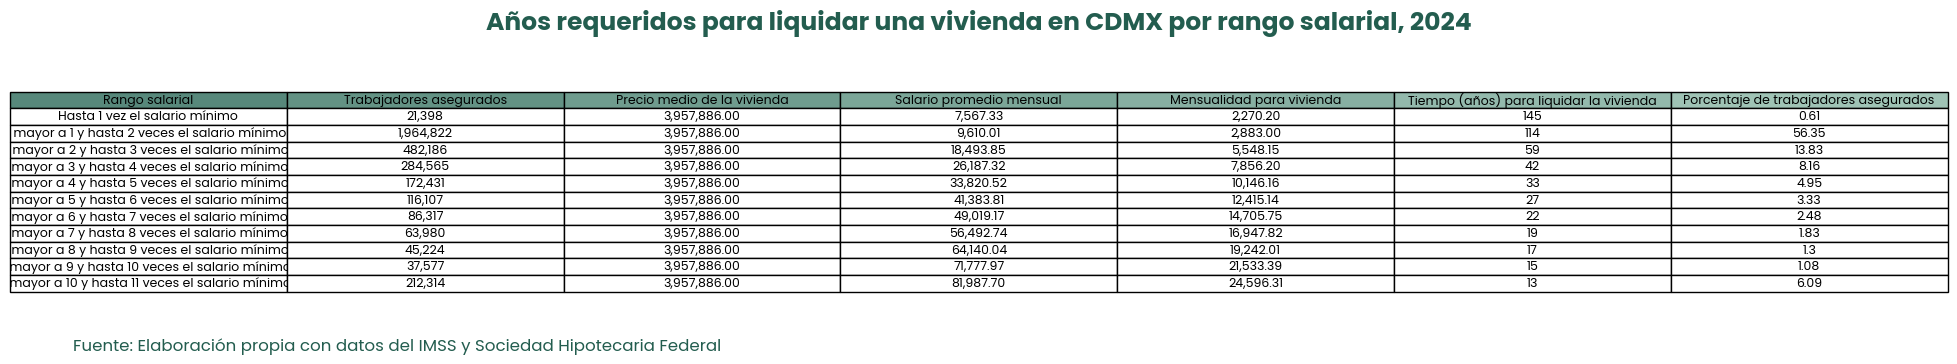

In [188]:
plt.rcParams['font.family'] = 'Poppins'
# Definir color de la tabla
colors = ["#235D4F", "#D3EEE1"] 
cm = LinearSegmentedColormap.from_list('custom', colors, N=256)

fig, ax = plt.subplots(figsize=(25, 4))
num_columns = len(tabla_resumen.columns)

# Aplicar el color a las columnas
col_colours = [cm(0.3 + i * (0.7 - 0.3) / (num_columns - 1)) for i in range(num_columns)]
#Agregar titulo
plt.title('Años requeridos para liquidar una vivienda en CDMX por rango salarial, 2024',  fontsize=18, fontweight='bold', color='#235D4F')
#Eliminar ejes
plt.axis('off')
#Añadir fuente
plt.text(0.2, 0, "Fuente: Elaboración propia con datos del IMSS y Sociedad Hipotecaria Federal"
                , ha='center', va='center', fontsize=12, color='#235D4F')

# Crear tabla
table = ax.table(cellText=tabla_resumen.values, colLabels=tabla_resumen.columns, loc='center', colColours=col_colours)

# Adjust font size for the table contents
table.auto_set_font_size(False)
table.set_fontsize(9)

# Centrar texto de las celdas
for key, cell in table.get_celld().items():
    cell.set_text_props(ha='center')
    
#Salvar tabla
plt.savefig('tiempo_liquida_vivienda.png', dpi=300, bbox_inches='tight')
